# Priopunkt - Estimation of train passenger demand (on Södra stambanan)

This is a simple version of the analysis using basic data, a more advanced version will be implemented after!

### Read data (estimates from SamPers 2018)

In [2]:
# import pandas lib as pd
import pandas as pd

# read excel file
filename = "Sampers_snabbtåg_indata_2018_södrastambanan.xlsx"

# read by default 1st sheet of an excel file
df = pd.read_excel(filename)
df.sample(3).T

,376,78,416
line,8003,8002,8004
Från-Station,Stuvsta,Tjörnarp,Mjölby
Till-Station,Älvsjö,Höör,Lindekullen
Nat Priv,1175.68812,192.02324,149.30985
Nat Tj,303.06232,45.14032,41.44389
Totalt ombord,1478.75044,237.16356,190.75374
Nat Priv2,0.0,0.0,0.0
Nat Tj3,0.0,0.0,0.0
Totalt påstigande,0.0,0.0,0.0
Nat Priv5,0.0,0.0,0.0


### Rename the columns

In [3]:
# Original column names
original_columns = df.columns.tolist()

# New column names you want to assign
new_columns = ['Line', 'From', 'To', 
               'Onboard_private','Onboard_business', 'Onboard_total', 
               'Boarding_private','Boarding_business', 'Boarding_total', 
               'Alighting_private','Alighting_business', 'Alighting_total']

# Create a dictionary to map original names to new names
columns_mapping = dict(zip(original_columns, new_columns))

# Rename the columns
df = df.rename(columns=columns_mapping)
df.sample(10).T

,525,479,93,141,341,556,539,74,55,125
Line,8004,8004,8002,8002,8003,8004,8004,8002,8002,8002
From,Flisby,Åkarp,Arlöv,Grimstorp,Sommen,Kolke,Gistad,Hässleholm,Rörvik,Diö Norra
To,Aneby,Åkarps norra,Malmö godsbangård,Nässjö central,Boxholm,Gnesta,Norsholm,Mellby,Lammhult,Eneryda
Onboard_private,140.17112,46.3353,138.87448,241.16714,1689.07432,174.21512,189.58972,192.02324,226.9681,241.16714
Onboard_business,39.0549,19.1876,34.77637,53.57759,390.48651,43.43409,49.6817,45.14032,50.6704,53.57759
Onboard_total,179.22602,65.5229,173.65085,294.74473,2079.56083,217.64921,239.27142,237.16356,277.6385,294.74473
Boarding_private,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.84834,0.0,0.0
Boarding_business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.37275,0.0,0.0
Boarding_total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.22109,0.0,0.0
Alighting_private,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Some basic statistcs
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Line,570.0,8003.000000,0.817214,8002.0000,8002.00000,8003.00000,8004.00000,8004.00000
Onboard_private,570.0,587.781500,601.932041,46.3353,159.06815,226.96810,1229.45478,1769.53588
Onboard_business,570.0,145.946615,143.973055,19.1876,43.43409,53.57759,313.83975,424.34066
Onboard_total,570.0,733.728114,745.546894,65.5229,208.55414,281.19900,1543.29453,2193.87654
Boarding_private,570.0,11.168034,71.157346,0.0000,0.00000,0.00000,0.00000,1194.27000
Boarding_business,570.0,3.061632,18.996840,0.0000,0.00000,0.00000,0.00000,298.43900
Boarding_total,570.0,14.229666,89.985632,0.0000,0.00000,0.00000,0.00000,1492.70900
Alighting_private,570.0,11.168041,71.445812,0.0000,0.00000,0.00000,0.00000,1175.69000
Alighting_business,570.0,3.061631,18.860624,0.0000,0.00000,0.00000,0.00000,303.06200
Alighting_total,570.0,14.229672,90.149306,0.0000,0.00000,0.00000,0.00000,1478.75200


### Data exploration

The data is given for different lines, i.e., 8002, 8003 and 8004. According to the data about the lines, 8002 has 2 double turns, 8003 has 8 and 8003 has 3.

Let us start by exploring the data for these different lines.

In [5]:
# Display statistics for numeric columns grouped by 'line'
df.groupby('Line').describe().T

Line                         8002         8003        8004
Onboard_private count  190.000000   190.000000  190.000000
                mean   220.151634  1410.669872  132.522993
                std     28.380414   251.165564   44.263680
                min    138.874480   826.130000   46.335300
                25%    225.566000  1229.454780   98.531520
...                           ...          ...         ...
Alighting_total min      0.000000     0.000000    0.000000
                25%      0.000000     0.000000    0.000000
                50%      0.000000     0.000000    0.000000
                75%      0.000000     0.000000    0.000000
                max    298.067400  1478.752000  208.553700

[72 rows x 3 columns]

#### Boardings and alightings per line

These are "probably" the average ridership per normal day. Note that the numbers for line 8003 are substantially higher than those of the other lines. This is due to the fact that line 8003 has more departure per day than the other lines.

Now, let us plot the ridership data.

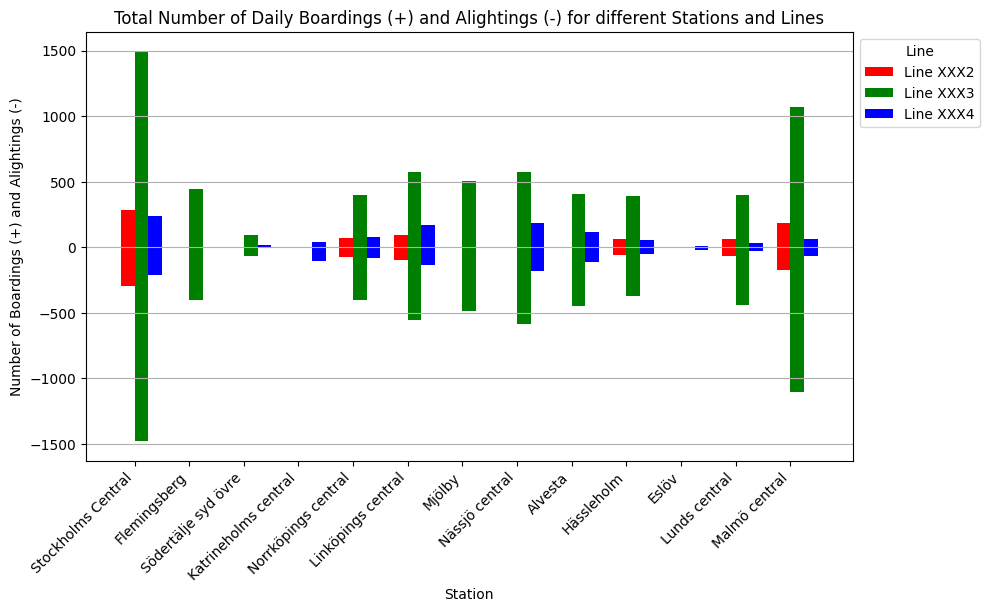

In [16]:
import matplotlib.pyplot as plt
import numpy as np

stations = [
    "Stockholms Central", "Stockholms Södra", "Årstaberg", "Älvsjö", "Stuvsta",
    "Huddinge", "Flemingsberg", "Björnkulla", "Malmsjö", "Södertälje syd övre",
    "Bränninge", "Järna", "Mölnbo", "Gnesta", "Kolke", "Björnlunda", "Stjärnhov",
    "Nyckelsjön", "Sparreholm", "Skebokvarn", "Flen", "Sköldinge", "Stolpstugan",
    "Katrineholms central", "Strångsjö", "Simonstorp", "Åby", "Norrköpings central",
    "Fiskeby", "Kimstad", "Norsholm", "Gistad", "Linghem", "Linköpings central",
    "Vikingstad", "Mantorp", "Mjölby", "Lindekullen", "Boxholm", "Sommen",
    "Tranås", "Gripenberg", "Frinnaryd", "Ralingsås", "Aneby", "Flisby", "Vimnarp",
    "Gamlarp", "Nässjö central", "Grimstorp", "Bodafors", "Ulvstorp", "Sävsjö",
    "Aleholm", "Stockaryd", "Rörvik", "Lammhult", "Grevaryd", "Lidnäs", "Moheda",
    "Gåvetorp", "Alvesta", "Blädinge", "Vislanda", "Eneryda", "Diö Norra", "Diö Södra",
    "Älmhult", "Killeberg", "Tunneby", "Osby", "Hästveda", "Mosselund", "Ballingslöv",
    "Hässleholm", "Mellby", "Sösdala", "Vätteryd", "Tjörnarp", "Höör", "Stehag", "Eslöv",
    "Dammstorp", "Örtofta", "Stångby", "Tornhill", "Lunds central", "Klostergården",
    "Flackarp", "Hjärup", "Åkarps norra", "Åkarp", "Burlöv", "Arlöv", "Malmö godsbangård",
    "Malmö central"
]

def plot_ridership(boarding, alighting):
    # Plotting
    plt.figure(figsize=(10, 6))

    # Set the width of the bars
    width = 0.25  

    # Define colors for each line
    colors = ['red', 'green', 'blue']

    # Calculate the positions for the group of bars
    bar_positions = np.arange(len(boarding.index))

    # Plot the sum of boardings for each station as separate bars above the x-axis
    for i, line in enumerate(boarding.columns):
        plt.bar(bar_positions + i * width, boarding[line], width=width, color=colors[i], label=f'Line {line}')

    # Plot the sum of alightings for each station as separate bars below the x-axis
    for i, line in enumerate(alighting.columns):
        plt.bar(bar_positions + i * width, -alighting[line], width=width, color=colors[i])

    
    plt.xlabel('Station')
    plt.ylabel('Number of Boardings (+) and Alightings (-)')
    plt.xticks(bar_positions + width / 2, boarding.index, rotation=45, ha='right')
    plt.legend(title='Line', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(axis='y')
    plt.tight_layout()
    

# Group by 'From' and 'Line' and sum boardings
df_grouped_boarding = df.groupby(['From', 'Line'])['Boarding_total'].sum().unstack()
df_grouped_alighting = df.groupby(['To', 'Line'])['Alighting_total'].sum().unstack()

# Reindex the filtered dataframes to maintain the same order as the 'stations' list
df_grouped_boarding_ordered = df_grouped_boarding.reindex(stations)
df_grouped_alighting_ordered = df_grouped_alighting.reindex(stations)

# Filter out stations with zero boardings and alightings
df_grouped_boarding_filtered = df_grouped_boarding_ordered[(df_grouped_boarding_ordered.sum(axis=1) != 0)]
df_grouped_alighting_filtered = df_grouped_alighting_ordered[(df_grouped_alighting_ordered.sum(axis=1) != 0)]

df_grouped_boarding_filtered.columns = ["XXX2","XXX3","XXX4"]
df_grouped_alighting_filtered.columns = ["XXX2","XXX3","XXX4"]

# Plotting
plot_ridership(df_grouped_boarding_filtered, df_grouped_alighting_filtered)
plt.title('Total Number of Daily Boardings (+) and Alightings (-) for different Stations and Lines')
plt.show()

We can directly notice that the total number of boardings are slightly equal to the total number of alightings per day for the different lines between Stockholm and Malmö. This is because we considered the sum for both directions. Later, we will look at the ridership per direction of travel.

Also, note the high ridership on line 8003, this is again because this line has 8 double turns (or departures and returns) compared to the other lines which have only 2-3.
Let us now look at the average ridership per single train departure.

#### Average Boardings and alightings per departure

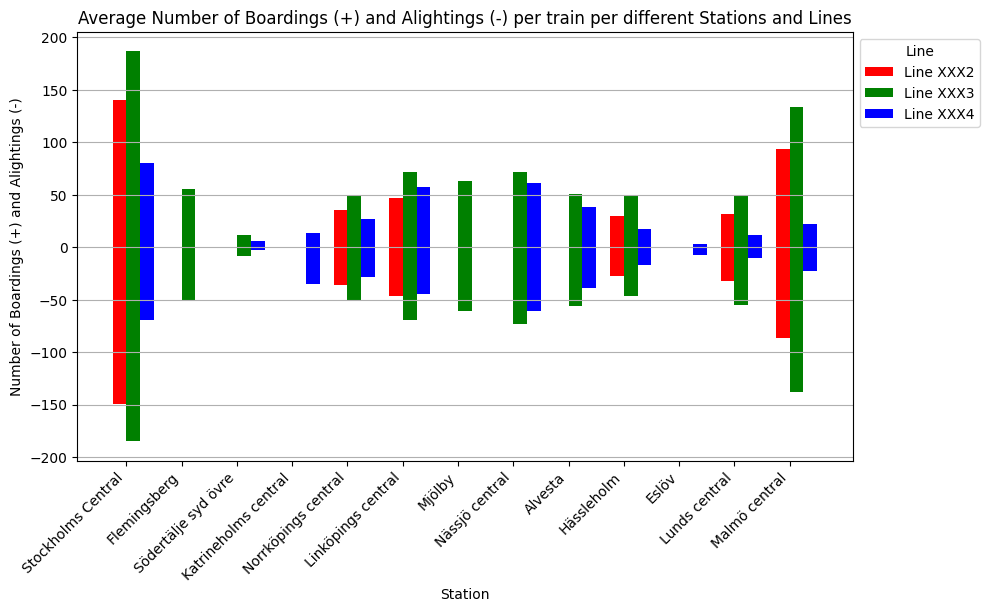

In [17]:
# Calculate the average  per single departure
def get_ridership_per_train(df):
    # Define the number of turns for each line
    df_avg = df.copy()
    turns = {'XXX2': 2, 'XXX3': 8, 'XXX4': 3}
    for line, turn in turns.items():
        df_avg[line] = df[line] / turn     
    return df_avg

# Calculate the average boardings per single departure
df_grouped_boarding_avg = get_ridership_per_train(df_grouped_boarding_filtered)

# Calculate the average alightings per single departure
df_grouped_alighting_avg = get_ridership_per_train(df_grouped_alighting_filtered)

# Assuming plot_ridership is a function that plots the given data
plot_ridership(df_grouped_boarding_avg, df_grouped_alighting_avg)
plt.title('Average Number of Boardings (+) and Alightings (-) per train per different Stations and Lines')
plt.show()

We see that, even if we take the average ridership per train departure, train line 8003 has still the highest ridership compared to the other lines.

Now, we gonna look at the ridership per direction of travel, i.e., boardings and alighting for southbound trips and for northbound trips.

#### Average boardings to southern stations

Let us first look at the boardings (per train) for southbound trips.

<Figure size 1000x600 with 0 Axes>

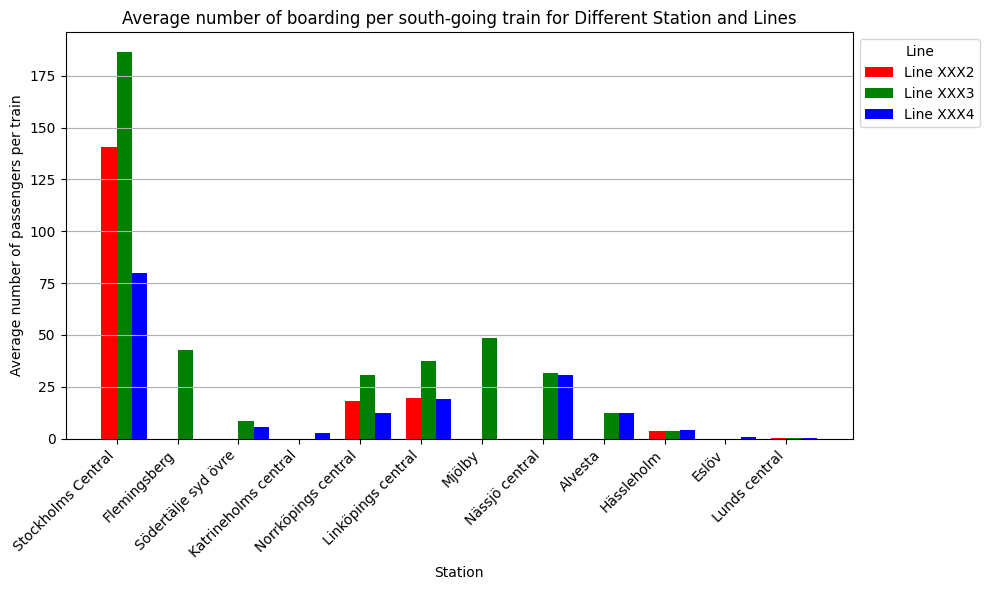

In [21]:
# function to find if the diection of travel is southwards, from Stockholm Central to Malmö central
def is_direction_south(from_station, to_station):
    from_idx = stations.index(from_station)
    till_idx = stations.index(to_station)
    return from_idx <= till_idx

# Apply the function to each row in the DataFrame
df_direction_south = df.copy()
df_direction_south["IsDirSouth"] = df_direction_south.apply(lambda row: is_direction_south(row['From'], row['To']), axis=1)

def get_avg_ridership(df_dir, is_south, ridership, per_line=True):
    my_columns = ["XXX2","XXX3","XXX4"]
    line = ['Line']
    if(not per_line):
        my_columns = ["average_line"]
    # Group by 'From', 'Line', and 'IsDirSouth' and sum boardings
    df_south_dir = []
    if(ridership == "boarding"):
        df_south_dir= df_dir[df_dir["IsDirSouth"] == is_south].groupby(['From'] + line)['Boarding_total'].sum().unstack()
    else:
        df_south_dir= df_dir[df_dir["IsDirSouth"] == is_south].groupby(['To'] + line)['Alighting_total'].sum().unstack()
    # Reindex the filtered dataframes to maintain the same order as the 'stations' list
    df_south_dir_sorted = df_south_dir.reindex(stations)
    # Filter out stations with zero boardings and alightings
    df_south_dir_sorted = df_south_dir_sorted[(df_south_dir_sorted.sum(axis=1) != 0)]
    df_south_dir_sorted = df_south_dir_sorted[~df_south_dir_sorted.sum(axis=1).isnull()]
    # set the lines
    df_south_dir_sorted.columns = my_columns
    # calculate average per train
    df_south_dir_sorted_avg = get_ridership_per_train(df_south_dir_sorted)
    return df_south_dir_sorted_avg

# calculate average per train
df_south_boarding_sorted_avg = get_avg_ridership(df_direction_south, is_south=True, ridership="boarding")

def plot_avg_ridership(df_avg, direction, ridership):
    # Plotting
    plt.figure(figsize=(10, 6))
    # Set the width of the bars
    width = 0.25  
    # Define colors for each line
    colors = ['red', 'green', 'blue'] 
    # Plotting
    plt.figure(figsize=(10, 6))

    # Set the width of the bars
    width = 0.25  

    # Define colors for each line
    colors = ['red', 'green', 'blue']

    # Calculate the positions for the group of bars
    bar_positions = np.arange(len(df_avg.index))

    # Plot the sum of boardings for each station as separate bars above the x-axis
    is_boarding = +1
    if(ridership != "boarding"):
        is_boarding = -1
    for i, line in enumerate(df_avg.columns):
        plt.bar(bar_positions + i * width, is_boarding*df_avg.loc[df_avg.index, line], width=width, color=colors[i], label=f'Line {line}')

    plt.title(f'Average number of {ridership} per {direction}-going train for Different Station and Lines')
    plt.xlabel('Station')
    plt.ylabel('Average number of passengers per train')
    plt.xticks(bar_positions + width / 2, df_avg.index, rotation=45, ha='right')
    plt.legend(title='Line', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_avg_ridership(df_south_boarding_sorted_avg, direction="south", ridership="boarding")

#### Average alighting to southern stations

<Figure size 1000x600 with 0 Axes>

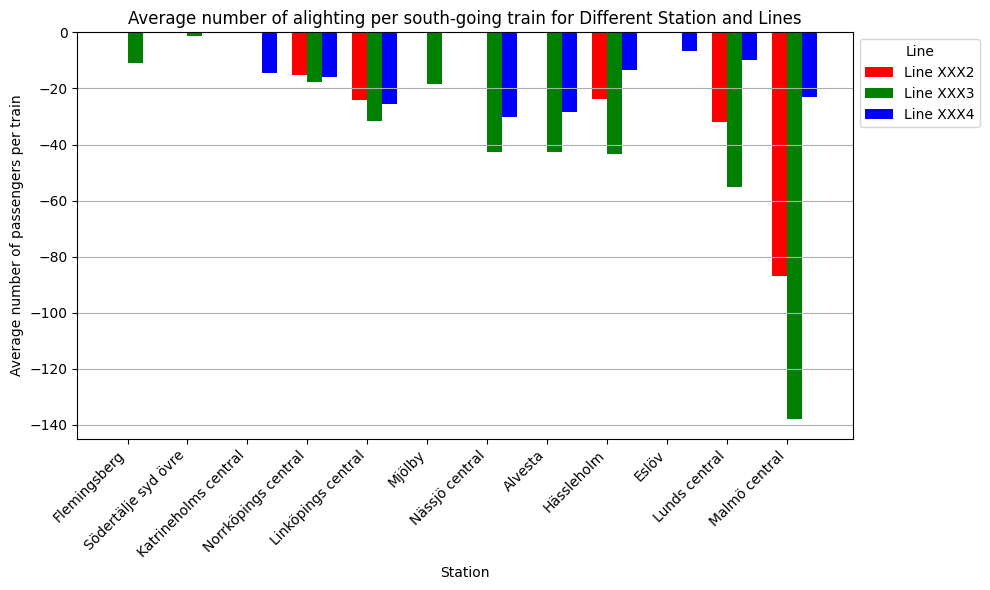

In [22]:
# calculate average per train
df_south_alighting_sorted_avg = get_avg_ridership(df_direction_south, is_south=True, ridership="alighting")


# Plotting
plot_avg_ridership(df_south_alighting_sorted_avg, direction="south", ridership="alighting")

#### Average boardings and alightings to northern stations

Let us do the same for the northbound trips. First the boardings (per train) and then the alightings.

<Figure size 1000x600 with 0 Axes>

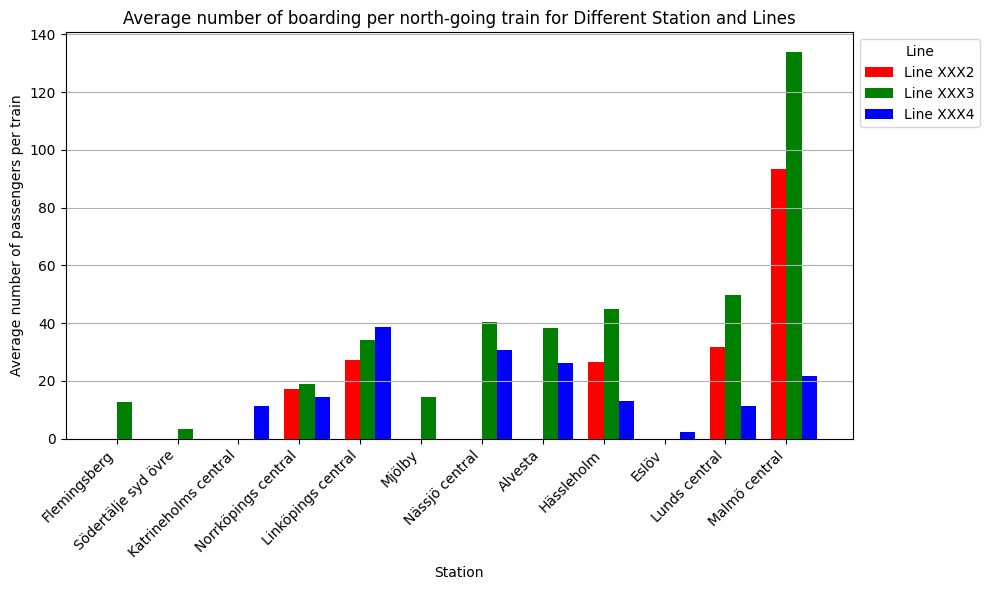

<Figure size 1000x600 with 0 Axes>

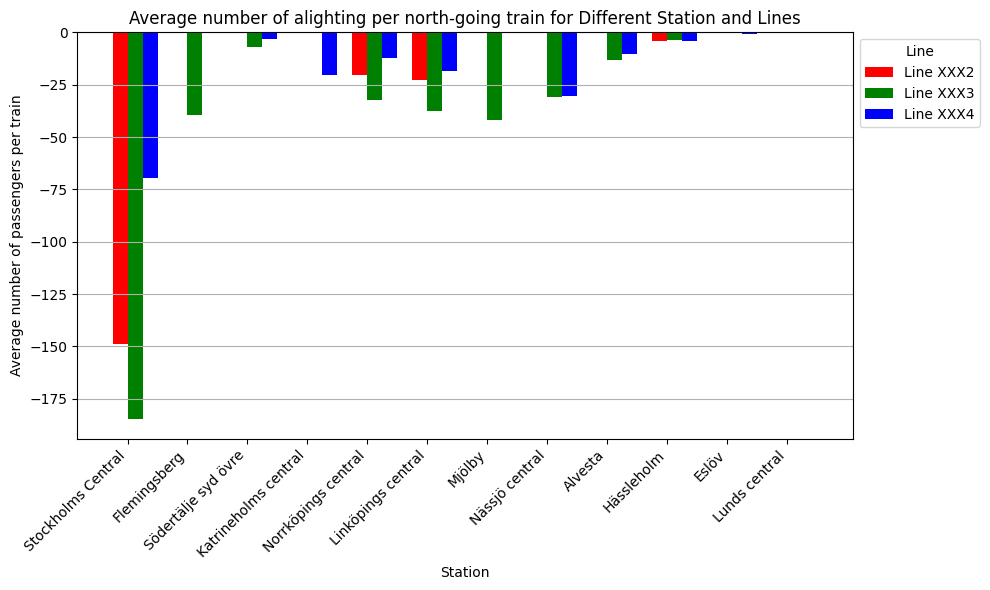

In [23]:
# calculate average per train
df_north_boarding_sorted_avg = get_avg_ridership(df_direction_south, is_south=False, ridership="boarding")
df_north_alighting_sorted_avg = get_avg_ridership(df_direction_south, is_south=False, ridership="alighting")

# Plotting
plot_avg_ridership(df_north_boarding_sorted_avg, direction="north", ridership="boarding")
plot_avg_ridership(df_north_alighting_sorted_avg, direction="north", ridership="alighting")

### Data preprocessing (average ridership per train departure)

Notice that the data is provided for different lines, which have different number of departures per day and also different stopping patterns.

To simplify the upcoming analysis, we will need to preprocess this data and convert the numbers to an average number per departure given the information we have on the number of departures for the different lines. To do this, we focus on the number of passengers onboard from now on!

To simplify further, we can take the average over the different lines, so we will have the average ridership for a typical/average train departure.

In [34]:
# select only the number of passengers onboard
df_onboard = df_direction_south[['Line', 'From', 'To', 'Onboard_private', 'Onboard_business', 'Onboard_total', 'IsDirSouth']]

# Group by 'Line', 'From', and 'To' and calculate the sum for onboard columns
# Also, get the first non-null 'IsDirSouth' value for each group
df_onboard_per_day = df_onboard.groupby(['From', 'To']).agg({
    'Onboard_private': 'sum',
    'Onboard_business': 'sum',
    'Onboard_total': 'sum',
    'IsDirSouth': 'first',
}).reset_index()

# Define the number of double turns for each line (this is provided in Sampers data or tågplan)
turns = {8002: 2, 8003: 8, 8004: 3}
total_turns = sum(turns.values())

# get the average per train departure
df_onboard_per_train = df_onboard_per_day.copy()
df_onboard_per_train['Onboard_private'] /= total_turns
df_onboard_per_train['Onboard_business'] /= total_turns
df_onboard_per_train['Onboard_total'] /= total_turns

Let us now plot the ridership (number of pax onboard) for different directions

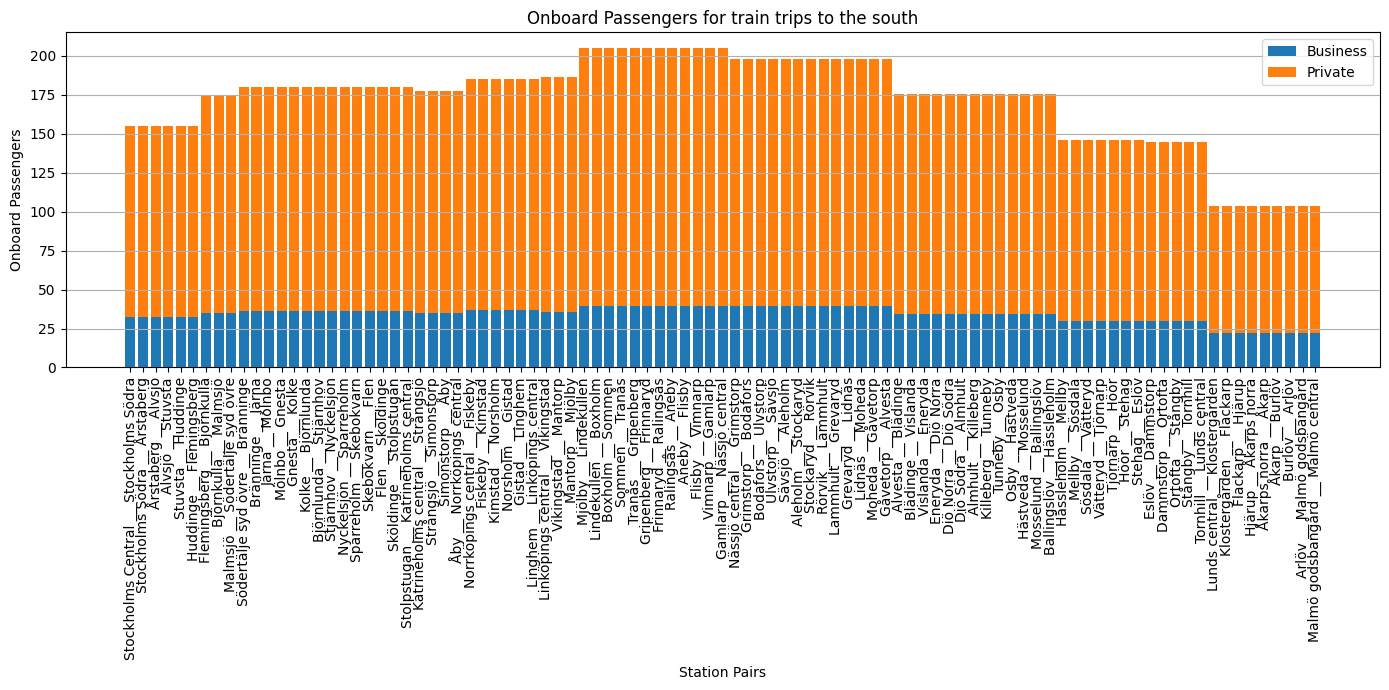

In [32]:
# Assuming 'stations' is your list of stations ordered from north to south
station_pairs = [f'{stations[i]} __ {stations[i+1]}' for i in range(len(stations)-1)]

# Filter the DataFrame for north-going trips
df_south_going = df_onboard_per_train[df_onboard_per_train['IsDirSouth'] == True].copy()

# Now, adjust 'df_south_going' DataFrame to have 'Station_Pair' in the same format
df_south_going['Station_Pair'] = df_south_going.apply(lambda x: f"{x['From']} __ {x['To']}", axis=1)

# Ensure the pairs are in the same order as your station_pairs list
df_south_going['Station_Pair'] = pd.Categorical(df_south_going['Station_Pair'], categories=station_pairs, ordered=True)

# Sort the DataFrame based on the 'Station_Pair' order
df_south_going.sort_values('Station_Pair', inplace=True)

# Sort the DataFrame based on the 'Station_Pair' order
df_south_going.sort_values('Station_Pair', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))

# Plot 'Onbord_business' and 'Onbord_private' as stacked bars
plt.bar(df_south_going['Station_Pair'], df_south_going['Onboard_business'], label='Business')
plt.bar(df_south_going['Station_Pair'], df_south_going['Onboard_private'], bottom=df_south_going['Onboard_business'], label='Private')

plt.xlabel('Station Pairs')
plt.ylabel('Onboard Passengers')
plt.title('Onboard Passengers for train trips to the south')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Let us do a similar plot but for the north going trains

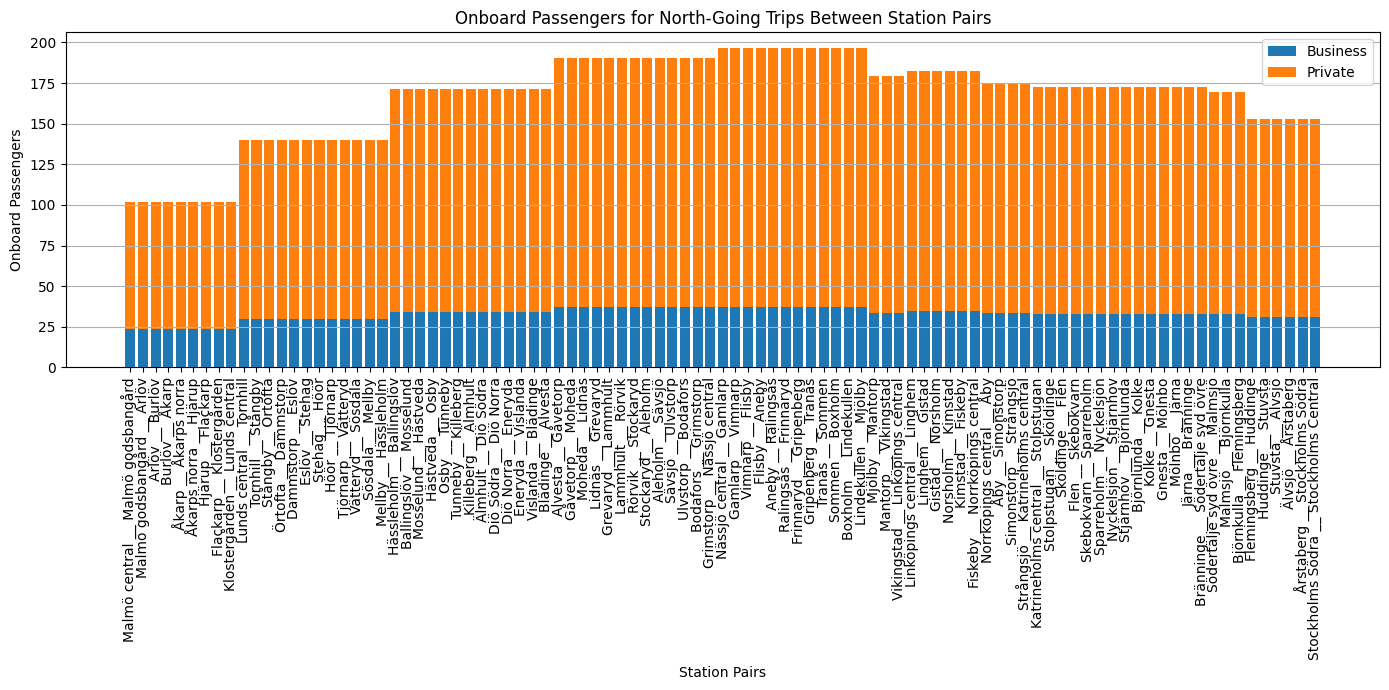

In [33]:
# Assuming 'stations' is your list of stations ordered from north to south
stations_inverted = stations[::-1]
station_pairs = [f'{stations_inverted[i]} __ {stations_inverted[i+1]}' for i in range(len(stations_inverted)-1)]

# Filter the DataFrame for north-going trips
df_north_going = df_onboard_per_train[df_onboard_per_train['IsDirSouth'] == False].copy()

# Now, adjust 'df_north_going' DataFrame to have 'Station_Pair' in the same format
df_north_going['Station_Pair'] = df_north_going.apply(lambda x: f"{x['From']} __ {x['To']}", axis=1)

# Ensure the pairs are in the same order as your station_pairs list
df_north_going['Station_Pair'] = pd.Categorical(df_north_going['Station_Pair'], categories=station_pairs, ordered=True)

# Sort the DataFrame based on the 'Station_Pair' order
df_north_going.sort_values('Station_Pair', inplace=True)

# Sort the DataFrame based on the 'Station_Pair' order
df_north_going.sort_values('Station_Pair', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))

# Plot 'Onbord_business' and 'Onbord_private' as stacked bars
plt.bar(df_north_going['Station_Pair'], df_north_going['Onboard_business'], label='Business')
plt.bar(df_north_going['Station_Pair'], df_north_going['Onboard_private'], bottom=df_north_going['Onboard_business'], label='Private')

plt.xlabel('Station Pairs')
plt.ylabel('Onboard Passengers')
plt.title('Onboard Passengers for North-Going Trips Between Station Pairs')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Let us export these results to a CSV file.

In [ ]:
# save in a csv file
output_filename = "2018_ombord_per_snabbtåg_Sthlm_Malmö.csv"
columns_to_save = ['From', 'To', 'Onboard_private', 'Onboard_business', 'Onboard_total']
df_onboard_per_train.to_csv(output_filename, index=False, columns=columns_to_save)

# Variation over time (TO DO NEXT!)

So far, we have focused on the average ridership (#pax onboard) for a given high-speed train departure between Stockholm central and Malmö central on a typical working day. However, this average ridership can vary depending on: day (working day or not), time of the day (peak versus off-peak), etc.

We will use this average ridership (and train vehicle capacity) to estimate the ridership for the different times. Let us start looking at peak versus off-peak during a working day.

### Working day (peak versus off-peak)

We can assume a certain variation over the day for 